# Práctica 3: Modelo dinámico inverso de un robot y planteamiento de trayectoria

## Objetivo

Que el alumno resuelva la dinámica inversa de un manipulador serial, calculando el par necesario para desplazar el efector final de un punto inicial a un punto final a lo largo de una trayectoria lineal.


### Metas 

- Que el alumno aplique un modelo cinemático inverso para calcular una trayectoria a partir de una posición actual hacia una posición final
- Que el alumno aplique un modelo de dinámica inversa a través del método de Euler Lagrange para calcular los pares en las juntas del robot
- Que el alumno grafique y analice los resultados del modelo
- Que el alumno configure un repositorio en línea e incluya en éste su práctica

### Contribución al perfil del egresado

La siguiente práctica contribuye en los siguientes puntos al perfil del egresado:

#### Aptitudes y habilidades

- Para modelar, simular e interpretar el comportamiento de los sistemas mecatrónicos.
- Para diseñar, construir, operar y mantener los sistemas mecatrónicos y sus componentes.

#### Actitudes

- Tener confianza en su preparación académica.
- Comprometido con su actualización, superación y competencia profesional.

#### De tipo social

- Promover el cambio en la mentalidad frente a la competitividad internacional.

## Rúbrica de evaluación

La evaluación de la práctica contará de los siguientes puntos y se evaluará con los siguientes criterios:

| Elemento | Porcentaje |
|------| -----------:|
| **Cuestionario previo** | 15% | 
| **Desarrollo** | 35% |
| **Análisis de resultados**  | 35% |
| **Conclusiones** | 15% |

<br>

| Elemento | Malo | Regular | Bueno |
| :------| ------ | --------| ------|
| **Cuestionario previo** | El trabajo no contiene cuestionario previo o todas las preguntas son incorrectas (0%)| Al menos la mitad de las preguntas son correctas (8%) |  Todas las preguntas son correctas (15%) |
| **Desarrollo** | El trabajo no contiene desarrollo o su planteamiento no concuerda con lo deseado (0%) | El desarrollo está mal planteado o no llega a los resultados esperados (10%) | El desarrollo tiene un planteamiento adecuado y llega a los resultados esperados (35%) |
| **Análisis de resultados**  | El trabajo no contiene análisis de resultados o la información no se está interpretando correctamente (0%) | La interpretación de los resultados es parcial o desorganizada (10%) | Realiza un correcto análisis de los resultados de forma organizada   (35%) |
| **Conclusiones** | El trabajo no contiene conclusiones o no hacen referencia al trabajo desarrollado y los objetivos planteados (0%) | La redacción de las conclusiones es desorganizada o confusa (8%) | Las conclusiones del trabajo son claras y hacen referencia al trabajo desarrollado y los objetivos planteados (15%) | 



## Introducción

### Modelo dinámico
El modelo dinámico de un sistema permite analizar el movimiento del cuerpo atendiendo a las causas que lo originan (fuerzas y pares)
En particular, para un manipulador serial, permite relacionar el par aplicado en las juntas de un robot con la posición del efector final, considerando fenómenos como la masa y la inercia.

### Modelo dinámico inverso
El modelo dinámico inverso permite conocer la posición del efector final en términos de los pares de las juntas. Para esto, se pueden tomar dos aproximaciones

### Ecuaciones de propagación
Las ecuaciones de propagación de velocidad permiten relacionar cómo el comportamiento de un eslabón dentro de una cadena cinemática afecta a los otros eslabones dentro de la cadena. Se puede analizar la propagación de las fuerzas y de la velocidad dentro de una cadena.

### Modelo Newton-Euler
Las ecuaciones de Newton-Euler relacionan la cantidad de movimiento lineal y angular con las fuerzas y pares a los que es sometido cada uno de los eslabones

### Modelo Euler-Lagrange
El modelo de Euler-Lagrange permite relacionar la energía cinética y potencial con las perturbaciones dentro de un sistema, a través del principio de mínima acción. 

## Cuestionario previo

Responder de forma breve las siguientes preguntas:

- ¿Qué es el análisis de dinámica inversa y qué nos permite obtener?

El análisis de dinámica inversa consiste en expresar las fuerzas y pares que intervienen en función de la evolución de las coordenadas articulares y sus derivadas, conociendo la posición final del efector final.

- ¿A través de qué modelados se puede realizar un análisis de dinámica inversa?

- ¿De qué condiciones ó fenómenos físicos dependen los pares en las juntas de un robot para seguir una trayectoria?
- ¿Cómo se aplica la derivada total de una función que está en términos de otras variables que a su vez están en términos de la variable respecto a la que se realiza la derivada total?

En caso de integrar imagenes, colocarlas en la carpeta *"imagenes"*

## Desarrollo

### 1. Planteamiento de la cinemática inversa y obtención de la trayectoria
En esta primera parte, se realiza el análisis de la cinemática inversa, que permite obtener las posiciones, velocidades y aceleraciones de las juntas del robot, dada **una posición inicial de las juntas y una posición final del efector final**. Se puede retomar de la práctica anterior. 
Un diagrama del robot se muestra en la imagen:

<img src="imagenes/p3_1.png" alt = "Robot RRR" width="300" height="300" display= "block"/>

** Considerar valores cualesquiera para las dimensiones de los eslabones y la posición inicial de las juntas

In [3]:
from sympy import *
import numpy as np

class CinematicaInversa():
  def __init__(self, dim=(1, 1, 1)):
    self.dim = dim
    
  def trans_homo(self, x, y, z, gamma, beta, alpha):
    R_z = Matrix([ [cos(alpha), -sin(alpha), 0], [sin(alpha), cos(alpha), 0],[0, 0, 1]])
    R_y = Matrix([ [cos(beta), 0, -sin(beta)], [0, 1, 0],[sin(beta), 0, cos(beta)]])
    R_x = Matrix([ [1, 0, 0], [0, cos(gamma), -sin(gamma)],[0, sin(gamma), cos(gamma)]])
    R = R_x * R_y *R_z
    p = Matrix([[x],[y],[z]])
    T = Matrix.vstack(Matrix.hstack(R, p), Matrix([[0,0,0,1]]))
    return T 
    
  def cinematica_directa(self):
    print("Generando cinematica directa")
    self.theta_0_1, self.theta_1_2, self.theta_2_3 = symbols("theta_0_1 theta_1_2 theta_2_3")
    #Matrices de transformación
    self.T_0_1 = self.trans_homo(0, 0, 0, 0, 0, self.theta_0_1)
    self.T_1_2 = self.trans_homo(self.dim[0], 0, 0, 0, 0, self.theta_1_2)
    self.T_2_3 = self.trans_homo(self.dim[1], 0, 0, 0, 0, self.theta_2_3)
    self.T_3_P = self.trans_homo(self.dim[2], 0, 0, 0, 0, 0)
    self.T_0_P = simplify(self.T_0_1 * self.T_1_2 * self.T_2_3 * self.T_3_P)
    #Vector de postura xi = [x y th]
    self.xi_0_P = Matrix([[self.T_0_P[0, 3]],
                          [self.T_0_P[1, 3]],
                          [self.theta_0_1 + self.theta_1_2 + self.theta_2_3]])
  
  def generar_trayectoria(self, q_in = (pi/4, pi/4, pi/4), xi_fn = (2, 1, 0), tie = (0, 2), frec = 60):
    print("Creando trayectoria")
    #Variables para polinomio lambda
    self.t, self.a_0, self.a_1, self.a_2, self.a_3, self.a_4, self.a_5 = symbols(
    "t a_0 a_1 a_2 a_3 a_4 a_5")
    #Polinomio lambda lam = a0 + a1t + a2t^2 + a3t^3 + a4t^4 + a5t^5
    self.lam = self.a_0 + self.a_1 * self.t + self.a_2 * (self.t)**2 + self.a_3 * (self.t)**3 + self.a_4 * (self.t)**4+ self.a_5 * (self.t)**5
    #Primera y segunda derivada de lambda
    self.lam_dot = diff(self.lam, self.t)
    self.lam_dot_dot = diff(self.lam_dot, self.t)
    
    # Cálculo de parámetros de lambda. 
    # Planteando ecuaciones igualadas a cero
    # lam(t=ti) = 0
    # lam(t=tf) = 1   ==>  lam(t=tf) -1 = 0
    # lam'(t=ti) = 0
    # lam'(t=tf) = 0
    # lam''(t=ti) = 0
    # lam''(t=tf) = 0
    ec_1 = self.lam.subs(self.t, tie[0])
    ec_2 = self.lam.subs(self.t, tie[1]) - 1
    ec_3 = self.lam_dot.subs(self.t, tie[0])
    ec_4 = self.lam_dot.subs(self.t, tie[1])
    ec_5 = self.lam_dot_dot.subs(self.t, tie[0])
    ec_6 = self.lam_dot_dot.subs(self.t, tie[1])
    
    # Resolviendo sistema para las variables a0-a5
    terminos = solve([ec_1, ec_2, ec_3, ec_4, ec_5, ec_6], [self.a_0, self.a_1, self.a_2, self.a_3, self.a_4, self.a_5], dict = True)
    
    # Tomando la primera solución devuelta y sustituyéndola en el polinomio
    self.lam_s = self.lam.subs(terminos[0])
    self.lam_dot_s = self.lam_dot.subs(terminos[0])
    self.lam_dot_dot_s = self.lam_dot_dot.subs(terminos[0])

    # Calculo de la posicion inicial del efector final a partir del vector de postura
    xi_in = self.xi_0_P.subs({
      self.theta_0_1: q_in[0],
      self.theta_1_2: q_in[1],
      self.theta_2_3: q_in[2]
    })
    
    # Posiciones de espacio de trabajo
    # xi = xi_in + lam(t) * (xi_fn - xi_in) 
    self.xi = xi_in + Matrix([
      [self.lam_s * (xi_fn[0] - xi_in[0])],
      [self.lam_s * (xi_fn[1] - xi_in[1])],
      [self.lam_s * (xi_fn[2] - xi_in[2])]
    ])
    
    # Velocidades de espacio de trabajo
    # xi' = lam'(t) * (xi_fn - xi_in)
    self.xi_dot = Matrix([
      [self.lam_dot_s * (xi_fn[0] - xi_in[0])],
      [self.lam_dot_s * (xi_fn[1] - xi_in[1])],
      [self.lam_dot_s * (xi_fn[2] - xi_in[2])]
    ])
    
    # Aceleraciones de espacio de trabajo
    # xi'' = lam''(t) * (xi_fn - xi_in)
    self.xi_dot_dot = Matrix([
      [self.lam_dot_dot_s * (xi_fn[0] - xi_in[0])],
      [self.lam_dot_dot_s * (xi_fn[1] - xi_in[1])],
      [self.lam_dot_dot_s * (xi_fn[2] - xi_in[2])]
    ])

    # Muestreo del espacio de trabajo
    print("Muestreando trayectoria")
    # Número de muestras e incremento de tiempo
    self.muestras = int(frec * (tie[1] - tie[0]) + 1)
    self.dt = 1.0 / frec
    
    # Muestreo de tiempo entre tf y ti
    self.t_m = Matrix.zeros(1, self.muestras)
    self.t_m[0,0] = tie[0]
    for a in range(self.muestras - 1):
      self.t_m[0, a + 1] = self.t_m[0, a] + self.dt

    # Matrices vacías para guardar valores del espacio de trabajo
    # 3 filas, n columnas (cada columna es una posición/velocidad/aceleración del espacio de trabajo en un instante)
    self.xi_m = Matrix.zeros(3, self.muestras)
    self.xi_dot_m = Matrix.zeros(3, self.muestras)
    self.xi_dot_dot_m = Matrix.zeros(3, self.muestras)

    # Generando funciones para evitar usar lenguaje simbólico en las sustituciones
    xi_m_func = lambdify([self.t], self.xi)
    xi_dot_m_func = lambdify([self.t], self.xi_dot)
    xi_dot_dot_m_func = lambdify([self.t], self.xi_dot_dot)
    for a in range(self.muestras):
      """Así se sustituiría directo
      self.xi_m[:,a]          = self.xi.subs(self.t, self.t_m[0, a])
      self.xi_dot_m[:,a]      = self.xi_dot.subs(self.t, self.t_m[0, a])
      self.xi_dot_dot_m[:,a]  = self.xi_dot_dot.subs(self.t, self.t_m[0, a])"""
      self.xi_m[:, a] = xi_m_func(float(self.t_m[0, a]))
      self.xi_dot_m[:, a] = xi_dot_m_func(float(self.t_m[0, a]))
      self.xi_dot_dot_m[:, a] = xi_dot_dot_m_func(float(self.t_m[0, a]))
      print(a)

    #Agregando posición inicial como variable de la clase
    self.q_in = q_in

  def cinematica_inversa(self):
    print("Calculando cinematica inversa")
    # Variables para los valores de las velocidades del ws
    self.x_0_P_dot, self.y_0_P_dot, self.theta_0_P_dot = symbols(
    "x_0_P_dot y_0_P_dot theta_0_P_dot")
    # Derivada del vector de postura en términos de las velocidades del efector final
    # xi' = [x' y' th'] 
    self.xi_dot = Matrix([[self.x_0_P_dot], [self.y_0_P_dot], [self.theta_0_P_dot]])
    
    # Jacobiano
    self.J = Matrix.hstack(diff(self.xi_0_P, self.theta_0_1), 
                           diff(self.xi_0_P, self.theta_1_2), 
                           diff(self.xi_0_P, self.theta_2_3))
    self.J_inv = self.J.inv()
    
    # De la primera derivada, despejamos q': 
    # xi' = J * q'
    # q' = J-1 * xi'
    self.q_dot = self.J_inv * self.xi_dot

    # Crear una función a partir de la expresión simbólica
    q_dot_func = lambdify([self.x_0_P_dot, self.y_0_P_dot, self.theta_0_P_dot, self.theta_0_1, self.theta_1_2, self.theta_2_3], self.q_dot)

    # Matrices vacías para los valores de espacio de las juntas
    self.q_m = Matrix.zeros(3, self.muestras)
    self.q_dot_m = Matrix.zeros(3, self.muestras)
    self.q_dot_dot_m = Matrix.zeros(3, self.muestras)
    # Agregando posición inicial (dato)
    self.q_m[:,0] = Matrix([[self.q_in[0]], [self.q_in[1]], [self.q_in[2]]])
    # Agregando velocidad inicial
    # q' = J-1 * xi' => Obtenemos velocidad de las juntas 
    # en el punto actual sustituyendo velocidad actual del efector y 
    # posición actual de las juntas
    """Así se sustituiría directo
      q_dot_m[:,0] = self.q_dot.subs({
      self.x_0_P_dot:     xi_dot_m[0, 0],
      self.y_0_P_dot:     xi_dot_m[1, 0],
      self.theta_O_P_dot: xi_dot_m[2, 0],
      self.theta_O_1:     q_m[0, 0],
      self.theta_1_2:     q_m[1, 0],
      self.theta_2_3:     q_m[2, 0]})"""

    self.q_dot_m[:, 0] = q_dot_func(
        float(self.xi_dot_m[0, 0]),
        float(self.xi_dot_m[1, 0]),
        float(self.xi_dot_m[2, 0]),
        float(self.q_m[0, 0]),
        float(self.q_m[1, 0]),
        float(self.q_m[2, 0])
    )

    print("Calculando puntos")
    for a in range(self.muestras - 1):
      # Posición de las juntas
      # Posición siguiente = posición actual + velocidad actual * dt 
      self.q_m[:,a+1] = self.q_m[:,a] + self.q_dot_m[:,a] * self.dt
      
      # Velocidad de las juntas 
      # Velocidad siguiente de las juntas a partir de velocidad siguiente del efector y posición siguiente de las juntas
      """self.q_dot_m[:,a+1] = self.q_dot.subs({
                                          self.x_0_P_dot:     xi_dot_m[0, a],
                                          self.y_0_P_dot:     xi_dot_m[1, a],
                                          self.theta_O_P_dot: xi_dot_m[2, a],
                                          self.theta_O_1:     q_m[0, a],
                                          self.theta_1_2:     q_m[1, a],
                                          self.theta_2_3:     q_m[2, a]})"""
      self.q_dot_m[:, a + 1] = q_dot_func(
        float(self.xi_dot_m[0, a + 1]),
        float(self.xi_dot_m[1, a + 1]),
        float(self.xi_dot_m[2, a + 1]),
        float(self.q_m[0, a + 1]),
        float(self.q_m[1, a + 1]),
        float(self.q_m[2, a + 1]))
        
      # Aceleración
      # Aceleración actual = velocidad siguiente - velocidad actual / dt
      self.q_dot_dot_m[:,a] = (self.q_dot_m[:,a+1] - self.q_dot_m[:,a]) / self.dt

      print("Iteración: " + str(a))
    # Aceleración final (cero)
    self.q_dot_dot_m[:, self.muestras - 1] = Matrix.zeros(3, 1)
    
    print("Cinemática inversa completada")
    return self.q_m, self.q_dot_m, self.q_dot_dot_m

def main():
  robot = CinematicaInversa(dim=(1, 1, 1))
  
  robot.cinematica_directa()
  
  q_inicial = (pi/4, pi/4, pi/4)
  pos_final_efector = (2, 1, 0)
  
  robot.generar_trayectoria(
      q_in=q_inicial,
      xi_fn=pos_final_efector,
      tie=(0, 2),
      frec=60
  )
  
  posiciones, velocidades, aceleraciones = robot.cinematica_inversa()
  
  print("\nPrimeras posiciones calculadas (radianes):")
  for i in range(min(5, robot.muestras)):
      print(f"Muestra {i}: θ1={float(posiciones[0,i]):.4f}, θ2={float(posiciones[1,i]):.4f}, θ3={float(posiciones[2,i]):.4f}")

if __name__ == "__main__":
  main()

Generando cinematica directa
Creando trayectoria
Muestreando trayectoria
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
Calculando cinematica inversa
Calculando puntos
Iteración: 0
Iteración: 1
Iteración: 2
Iteración: 3
Iteración: 4
Iteración: 5
Iteración: 6
Iteración: 7
Iteración: 8
Iteración: 9
Iteración: 10
Iteración: 11
Iteración: 12
Iteración: 13
Iteración: 14
Iteración: 15
Iteración: 16
Iteración: 17
Iteración: 18
Iteración: 19
Iteración: 20
Iteración: 21
Iteración: 22
Iteración: 23
Iteración: 24
Iteración: 25
Iteración: 26
Iteración: 27
Iteración: 28
Iteración: 29
Iteración: 30
Iteración: 31
Iteración: 32
Iteración: 33
Iteración: 34
Iteración: 35
Iteración: 

### 2. Planteamiento de la dinámica inversa

### a) Planteamiento de la dinámica inversa: Matrices de inercia

Calcular las matrices de inercia de los eslabones considerando que su centro de masa concide con su centroide y constan de un prisma con las dimensiones usadas en el archivo URDF del robot.

In [4]:
def matriz_inercia(lx, ly, lz, masa):
    return Matrix([[(masa/12.0)*(ly**2 + lz**2), 0, 0], 
                  [0, (masa/12.0)*(lx**2 + lz**2), 0], 
                  [0, 0, (masa/12.0)*(lx**2 + ly**2)]])

def definir_inercia(masas = [0.25, 0.25, 0.25]):
    dim = (0.3, 0.3, 0.3)
    
    # Masas
    m1 = masas[0]
    m2 = masas[1]
    m3 = masas[2]
    # Matrices de inercia
    Ic1 = matriz_inercia(dim[0], 0.03, 0.03, m1)
    Ic2 = matriz_inercia(dim[0], 0.03, 0.03, m2)
    Ic3 = matriz_inercia(dim[0], 0.03, 0.03, m3)
    
    print("Matriz de inercia del shoulder_link:")
    print(Ic1)
    print("\nMatriz de inercia del arm_link:")
    print(Ic2)
    print("\nMatriz de inercia del forearm_link:")
    print(Ic3)
    
    Ic1_val = Ic1.evalf()
    Ic2_val = Ic2.evalf()
    Ic3_val = Ic3.evalf()
    print("\nValores numéricos:")
    print("\nMatriz de inercia del shoulder_link:")
    print(Ic1_val)
    print("\nMatriz de inercia del arm_link:")
    print(Ic2_val)
    print("\nMatriz de inercia del forearm_link:")
    print(Ic3_val)
    
    return Ic1, Ic2, Ic3

definir_inercia()

Matriz de inercia del shoulder_link:
Matrix([[3.75000000000000e-5, 0, 0], [0, 0.00189375000000000, 0], [0, 0, 0.00189375000000000]])

Matriz de inercia del arm_link:
Matrix([[3.75000000000000e-5, 0, 0], [0, 0.00189375000000000, 0], [0, 0, 0.00189375000000000]])

Matriz de inercia del forearm_link:
Matrix([[3.75000000000000e-5, 0, 0], [0, 0.00189375000000000, 0], [0, 0, 0.00189375000000000]])

Valores numéricos:

Matriz de inercia del shoulder_link:
Matrix([[3.75000000000000e-5, 0, 0], [0, 0.00189375000000000, 0], [0, 0, 0.00189375000000000]])

Matriz de inercia del arm_link:
Matrix([[3.75000000000000e-5, 0, 0], [0, 0.00189375000000000, 0], [0, 0, 0.00189375000000000]])

Matriz de inercia del forearm_link:
Matrix([[3.75000000000000e-5, 0, 0], [0, 0.00189375000000000, 0], [0, 0, 0.00189375000000000]])


(Matrix([
 [3.75e-5,          0,          0],
 [      0, 0.00189375,          0],
 [      0,          0, 0.00189375]]),
 Matrix([
 [3.75e-5,          0,          0],
 [      0, 0.00189375,          0],
 [      0,          0, 0.00189375]]),
 Matrix([
 [3.75e-5,          0,          0],
 [      0, 0.00189375,          0],
 [      0,          0, 0.00189375]]))

### b) Planteamiento de la dinámica inversa: Posiciones de los centros de masa
A partir de las matrices de transformación homogénea, obtener la posición de los centros de masa de los eslabones.

In [5]:
def trans_homo(x, y, z, gamma, beta, alpha):
    R_z = Matrix([ [cos(alpha), -sin(alpha), 0], [sin(alpha), cos(alpha), 0],[0, 0, 1]])
    R_y = Matrix([ [cos(beta), 0, -sin(beta)], [0, 1, 0],[sin(beta), 0, cos(beta)]])
    R_x = Matrix([ [1, 0, 0], [0, cos(gamma), -sin(gamma)],[0, sin(gamma), cos(gamma)]])
    R = R_x * R_y *R_z
    p = Matrix([[x],[y],[z]])
    T = Matrix.vstack(Matrix.hstack(R, p), Matrix([[0,0,0,1]]))
    return T

def definir_inercia(masas = [0.25, 0.25, 0.25]):
    dim = (0.3, 0.3, 0.3)
    theta_0_1, theta_1_2, theta_2_3 = symbols("theta_0_1 theta_1_2 theta_2_3")
    
    #Matrices de transformación
    T_0_1 = trans_homo(0, 0, 0, pi/2, 0, theta_0_1)
    T_1_2 = trans_homo(dim[0], 0, 0, 0, 0, theta_1_2)
    T_2_3 = trans_homo(dim[1], 0, 0, 0, 0, theta_2_3)
    T_3_P = trans_homo(dim[2], 0, 0, 0, 0, 0)
    T_0_P = simplify(T_0_1 * T_1_2 * T_2_3 * T_3_P)
    
    # Cinematica directa de cada sistema de referencia
    T_0_2 = T_0_1 * T_1_2
    T_0_3 = T_0_2 * T_2_3
    # Transformaciones de centros de masa
    T_1_C1 = trans_homo(dim[0] / 2, 0, 0, 0, 0, 0)
    T_2_C2 = trans_homo(dim[1] / 2, 0, 0, 0, 0, 0)
    T_3_C3 = trans_homo(dim[2] / 2, 0, 0, 0, 0, 0)
    T_0_C1 = simplify(T_0_1 * T_1_C1)
    T_0_C2 = simplify(T_0_2 * T_2_C2)
    T_0_C3 = simplify(T_0_3 * T_3_C3)
    #Vectores de posición de sistemas de referencia
    p_0_1 = T_0_1[:3, 3]
    p_1_2 = T_1_2[:3, 3]
    p_2_3 = T_2_3[:3, 3]
    p_0_1 = T_0_1[:3, 3]
    p_0_2 = T_0_2[:3, 3]
    p_0_3 = T_0_3[:3, 3]
    #Vectores de posición de centros de masa
    p_1_C1 = T_1_C1[:3, 3]
    p_2_C2 = T_2_C2[:3, 3]
    p_3_C3 = T_3_C3[:3, 3]
    p_0_C1 = T_0_C1[:3, 3]
    p_0_C2 = T_0_C2[:3, 3]
    p_0_C3 = T_0_C3[:3, 3]
    #Rotaciones
    R_0_1 = T_0_1[:3, :3]
    R_1_2 = T_1_2[:3, :3]
    R_2_3 = T_2_3[:3, :3]
    Id = Matrix([[1,0,0], [0,1,0], [0,0,1]]) 

    # Variables de velocidad angular
    theta_0_1_dot = Symbol('theta_0_1_dot')
    theta_1_2_dot = Symbol('theta_1_2_dot')
    theta_2_3_dot = Symbol('theta_2_3_dot')
    # Variables de aceleración angular
    theta_0_1_dot_dot = Symbol('theta_0_1_dot_dot')
    theta_1_2_dot_dot = Symbol('theta_1_2_dot_dot')
    theta_2_3_dot_dot = Symbol('theta_2_3_dot_dot')
    # Masas
    m1 = masas[0]
    m2 = masas[1]
    m3 = masas[2]
    
    print("Vector de posición del centro de masa del shoulder_link en su sistema local:")
    print(p_1_C1)
    print("\nVector de posición del centro de masa del arm_link en su sistema local:")
    print(p_2_C2)
    print("\nVector de posición del centro de masa del forearm_link en su sistema local:")
    print(p_3_C3)
    print("\nVector de posición del centro de masa del shoulder_link en sistema global (función de theta_0_1):")
    print(p_0_C1)
    print("\nVector de posición del centro de masa del arm_link en sistema global (función de theta_0_1, theta_1_2):")
    print(p_0_C2)
    print("\nVector de posición del centro de masa del forearm_link en sistema global (función de theta_0_1, theta_1_2, theta_2_3):")
    print(p_0_C3)
    
    valores = {theta_0_1: 0, theta_1_2: 0, theta_2_3: 0}
    print("\nValores numéricos con ángulos = 0:")
    print("\nPosición del centro de masa del shoulder_link:")
    print(p_0_C1.subs(valores).evalf())
    print("\nPosición del centro de masa del arm_link:")
    print(p_0_C2.subs(valores).evalf())
    print("\nPosición del centro de masa del forearm_link:")
    print(p_0_C3.subs(valores).evalf())
    
    return T_0_1, T_1_2, T_2_3, T_3_P, T_0_C1, T_0_C2, T_0_C3, p_1_C1, p_2_C2, p_3_C3, p_0_C1, p_0_C2, p_0_C3

definir_inercia()

Vector de posición del centro de masa del shoulder_link en su sistema local:
Matrix([[0.150000000000000], [0], [0]])

Vector de posición del centro de masa del arm_link en su sistema local:
Matrix([[0.150000000000000], [0], [0]])

Vector de posición del centro de masa del forearm_link en su sistema local:
Matrix([[0.150000000000000], [0], [0]])

Vector de posición del centro de masa del shoulder_link en sistema global (función de theta_0_1):
Matrix([[0.15*cos(theta_0_1)], [0], [0.15*sin(theta_0_1)]])

Vector de posición del centro de masa del arm_link en sistema global (función de theta_0_1, theta_1_2):
Matrix([[0.3*cos(theta_0_1) + 0.15*cos(theta_0_1 + theta_1_2)], [0], [0.3*sin(theta_0_1) + 0.15*sin(theta_0_1 + theta_1_2)]])

Vector de posición del centro de masa del forearm_link en sistema global (función de theta_0_1, theta_1_2, theta_2_3):
Matrix([[0.3*cos(theta_0_1) + 0.3*cos(theta_0_1 + theta_1_2) + 0.15*cos(theta_0_1 + theta_1_2 + theta_2_3)], [0], [0.3*sin(theta_0_1) + 0.3*sin

(Matrix([
 [cos(theta_0_1), -sin(theta_0_1),  0, 0],
 [             0,               0, -1, 0],
 [sin(theta_0_1),  cos(theta_0_1),  0, 0],
 [             0,               0,  0, 1]]),
 Matrix([
 [cos(theta_1_2), -sin(theta_1_2), 0, 0.3],
 [sin(theta_1_2),  cos(theta_1_2), 0,   0],
 [             0,               0, 1,   0],
 [             0,               0, 0,   1]]),
 Matrix([
 [cos(theta_2_3), -sin(theta_2_3), 0, 0.3],
 [sin(theta_2_3),  cos(theta_2_3), 0,   0],
 [             0,               0, 1,   0],
 [             0,               0, 0,   1]]),
 Matrix([
 [1, 0, 0, 0.3],
 [0, 1, 0,   0],
 [0, 0, 1,   0],
 [0, 0, 0,   1]]),
 Matrix([
 [cos(theta_0_1), -sin(theta_0_1),  0, 0.15*cos(theta_0_1)],
 [             0,               0, -1,                   0],
 [sin(theta_0_1),  cos(theta_0_1),  0, 0.15*sin(theta_0_1)],
 [             0,               0,  0,                   1]]),
 Matrix([
 [cos(theta_0_1 + theta_1_2), -sin(theta_0_1 + theta_1_2),  0, 0.3*cos(theta_0_1) + 0.15*cos(t

### c) Planteamiento de la dinámica inversa: Velocidades de los centros de masa

A partir de las ecuaciones de propagación de la velocidad, obtener la velocidad lineal y angular de los centros de masa de los eslabones.

In [6]:
def generar_esfuerzos():
    theta_0_1, theta_1_2, theta_2_3 = symbols("theta_0_1 theta_1_2 theta_2_3")
    # Variables de velocidad angular
    theta_0_1_dot = Symbol('theta_0_1_dot')
    theta_1_2_dot = Symbol('theta_1_2_dot')
    theta_2_3_dot = Symbol('theta_2_3_dot')
    # Variables de aceleración angular
    theta_0_1_dot_dot = Symbol('theta_0_1_dot_dot')
    theta_1_2_dot_dot = Symbol('theta_1_2_dot_dot')
    theta_2_3_dot_dot = Symbol('theta_2_3_dot_dot')
    
    dim = (0.3, 0.3, 0.3)
    
    def trans_homo(x, y, z, gamma, beta, alpha):
        R_z = Matrix([ [cos(alpha), -sin(alpha), 0], [sin(alpha), cos(alpha), 0],[0, 0, 1]])
        R_y = Matrix([ [cos(beta), 0, -sin(beta)], [0, 1, 0],[sin(beta), 0, cos(beta)]])
        R_x = Matrix([ [1, 0, 0], [0, cos(gamma), -sin(gamma)],[0, sin(gamma), cos(gamma)]])
        R = R_x * R_y *R_z
        p = Matrix([[x],[y],[z]])
        T = Matrix.vstack(Matrix.hstack(R, p), Matrix([[0,0,0,1]]))
        return T
    
    #Matrices de transformación
    T_0_1 = trans_homo(0, 0, 0, pi/2, 0, theta_0_1)
    T_1_2 = trans_homo(dim[0], 0, 0, 0, 0, theta_1_2)
    T_2_3 = trans_homo(dim[1], 0, 0, 0, 0, theta_2_3)
    T_3_P = trans_homo(dim[2], 0, 0, 0, 0, 0)
    
    # Cinematica directa de cada sistema de referencia
    T_0_2 = T_0_1 * T_1_2
    T_0_3 = T_0_2 * T_2_3
    # Transformaciones de centros de masa
    T_1_C1 = trans_homo(dim[0] / 2, 0, 0, 0, 0, 0)
    T_2_C2 = trans_homo(dim[1] / 2, 0, 0, 0, 0, 0)
    T_3_C3 = trans_homo(dim[2] / 2, 0, 0, 0, 0, 0)
    T_0_C1 = simplify(T_0_1 * T_1_C1)
    T_0_C2 = simplify(T_0_2 * T_2_C2)
    T_0_C3 = simplify(T_0_3 * T_3_C3)
    #Vectores de posición de sistemas de referencia
    p_0_1 = T_0_1[:3, 3]
    p_1_2 = T_1_2[:3, 3]
    p_2_3 = T_2_3[:3, 3]
    p_0_1 = T_0_1[:3, 3]
    p_0_2 = T_0_2[:3, 3]
    p_0_3 = T_0_3[:3, 3]
    #Vectores de posición de centros de masa
    p_1_C1 = T_1_C1[:3, 3]
    p_2_C2 = T_2_C2[:3, 3]
    p_3_C3 = T_3_C3[:3, 3]
    p_0_C1 = T_0_C1[:3, 3]
    p_0_C2 = T_0_C2[:3, 3]
    p_0_C3 = T_0_C3[:3, 3]
    #Rotaciones
    R_0_1 = T_0_1[:3, :3]
    R_1_2 = T_1_2[:3, :3]
    R_2_3 = T_2_3[:3, :3]
    Id = Matrix([[1,0,0], [0,1,0], [0,0,1]]) 
    
    #Velocidades angulares de sistemas
    omega_1_1 = Matrix([0, 0, theta_0_1_dot])
    omega_2_2 = R_1_2.transpose() @ omega_1_1 + Matrix([0, 0, theta_1_2_dot])
    omega_3_3 = R_2_3.transpose() @ omega_2_2 + Matrix([0, 0, theta_2_3_dot]) 
    #Velocidades angulares de centros de masa
    omega_1_C1 = omega_1_1
    omega_2_C2 = omega_2_2
    omega_3_C3 = omega_3_3
    omega_1_C1_f = lambdify([theta_0_1_dot], omega_1_C1)
    omega_2_C2_f = lambdify([theta_0_1_dot, theta_1_2_dot], omega_2_C2)
    omega_3_C3_f = lambdify([theta_0_1_dot, theta_1_2_dot, theta_2_3_dot], omega_3_C3)
    #Velocidades lineales de sistemas
    v_1_1 = Matrix([0, 0, 0])
    v_2_2 = R_1_2.transpose() @ (v_1_1 + omega_1_1.cross(p_1_2))
    v_3_3 = R_2_3.transpose() @ (v_2_2 + omega_2_2.cross(p_2_3))
    #Velocidades lineales de centros de masa
    v_1_C1 = v_1_1 + omega_1_C1.cross(p_1_C1)
    v_2_C2 = v_2_2 + omega_2_C2.cross(p_2_C2)
    v_3_C3 = v_3_3 + omega_3_C3.cross(p_3_C3)
    v_1_C1_f = lambdify([theta_0_1, theta_0_1_dot], v_1_C1)
    v_2_C2_f = lambdify([theta_0_1, theta_0_1_dot, theta_1_2, theta_1_2_dot], v_2_C2)
    v_3_C3_f = lambdify([theta_0_1, theta_0_1_dot, theta_1_2, theta_1_2_dot, theta_2_3, theta_2_3_dot], v_3_C3)
    
    print("Velocidades angulares de los centros de masa (en coordenadas locales):")
    print("\nVelocidad angular del centro de masa del shoulder_link:")
    print(omega_1_C1)
    print("\nVelocidad angular del centro de masa del arm_link:")
    print(omega_2_C2)
    print("\nVelocidad angular del centro de masa del forearm_link:")
    print(omega_3_C3)

    print("\nVelocidades lineales de los centros de masa (en coordenadas locales):")
    print("\nVelocidad lineal del centro de masa del shoulder_link:")
    print(v_1_C1)
    print("\nVelocidad lineal del centro de masa del arm_link:")
    print(v_2_C2)
    print("\nVelocidad lineal del centro de masa del forearm_link:")
    print(v_3_C3)

    valores = {
        theta_0_1: pi/4, theta_1_2: pi/4, theta_2_3: pi/4,
        theta_0_1_dot: 0.5, theta_1_2_dot: 0.3, theta_2_3_dot: 0.2
    }

    print("\nValores numéricos con ángulos = π/4 y velocidades específicas:")
    print("\nVelocidad angular del centro de masa del shoulder_link:")
    print(omega_1_C1.subs(valores).evalf())
    print("\nVelocidad angular del centro de masa del arm_link:")
    print(omega_2_C2.subs(valores).evalf())
    print("\nVelocidad angular del centro de masa del forearm_link:")
    print(omega_3_C3.subs(valores).evalf())

    print("\nVelocidad lineal del centro de masa del shoulder_link:")
    print(v_1_C1.subs(valores).evalf())
    print("\nVelocidad lineal del centro de masa del arm_link:")
    print(v_2_C2.subs(valores).evalf())
    print("\nVelocidad lineal del centro de masa del forearm_link:")
    print(v_3_C3.subs(valores).evalf())
    
    return omega_1_C1_f, omega_2_C2_f, omega_3_C3_f, v_1_C1_f, v_2_C2_f, v_3_C3_f

generar_esfuerzos()

Velocidades angulares de los centros de masa (en coordenadas locales):

Velocidad angular del centro de masa del shoulder_link:
Matrix([[0], [0], [theta_0_1_dot]])

Velocidad angular del centro de masa del arm_link:
Matrix([[0], [0], [theta_0_1_dot + theta_1_2_dot]])

Velocidad angular del centro de masa del forearm_link:
Matrix([[0], [0], [theta_0_1_dot + theta_1_2_dot + theta_2_3_dot]])

Velocidades lineales de los centros de masa (en coordenadas locales):

Velocidad lineal del centro de masa del shoulder_link:
Matrix([[0], [0.15*theta_0_1_dot], [0]])

Velocidad lineal del centro de masa del arm_link:
Matrix([[0.3*theta_0_1_dot*sin(theta_1_2)], [0.3*theta_0_1_dot*cos(theta_1_2) + 0.15*theta_0_1_dot + 0.15*theta_1_2_dot], [0]])

Velocidad lineal del centro de masa del forearm_link:
Matrix([[0.3*theta_0_1_dot*sin(theta_1_2)*cos(theta_2_3) + (0.3*theta_0_1_dot*cos(theta_1_2) + 0.3*theta_0_1_dot + 0.3*theta_1_2_dot)*sin(theta_2_3)], [-0.3*theta_0_1_dot*sin(theta_1_2)*sin(theta_2_3) + 0.1

(<function _lambdifygenerated(theta_0_1_dot)>,
 <function _lambdifygenerated(theta_0_1_dot, theta_1_2_dot)>,
 <function _lambdifygenerated(theta_0_1_dot, theta_1_2_dot, theta_2_3_dot)>,
 <function _lambdifygenerated(theta_0_1, theta_0_1_dot)>,
 <function _lambdifygenerated(theta_0_1, theta_0_1_dot, theta_1_2, theta_1_2_dot)>,
 <function _lambdifygenerated(theta_0_1, theta_0_1_dot, theta_1_2, theta_1_2_dot, theta_2_3, theta_2_3_dot)>)

### d) Cálculo del Lagrangiano
Para calcular el Lagrangiano, calcular también las energías cinética y potencial de cada eslabón, y sumarlas. 

In [8]:
def generar_esfuerzos():
    theta_0_1, theta_1_2, theta_2_3 = symbols("theta_0_1 theta_1_2 theta_2_3")
    # Variables de velocidad angular
    theta_0_1_dot = Symbol('theta_0_1_dot')
    theta_1_2_dot = Symbol('theta_1_2_dot')
    theta_2_3_dot = Symbol('theta_2_3_dot')
    # Variables de aceleración angular
    theta_0_1_dot_dot = Symbol('theta_0_1_dot_dot')
    theta_1_2_dot_dot = Symbol('theta_1_2_dot_dot')
    theta_2_3_dot_dot = Symbol('theta_2_3_dot_dot')
    
    dim = (0.3, 0.3, 0.3)
    masas = [0.25, 0.25, 0.25]
    
    def trans_homo(x, y, z, gamma, beta, alpha):
        R_z = Matrix([ [cos(alpha), -sin(alpha), 0], [sin(alpha), cos(alpha), 0],[0, 0, 1]])
        R_y = Matrix([ [cos(beta), 0, -sin(beta)], [0, 1, 0],[sin(beta), 0, cos(beta)]])
        R_x = Matrix([ [1, 0, 0], [0, cos(gamma), -sin(gamma)],[0, sin(gamma), cos(gamma)]])
        R = R_x * R_y *R_z
        p = Matrix([[x],[y],[z]])
        T = Matrix.vstack(Matrix.hstack(R, p), Matrix([[0,0,0,1]]))
        return T
    
    def matriz_inercia(lx, ly, lz, masa):
        return Matrix([[(masa/12.0)*(ly**2 + lz**2), 0, 0], 
                      [0, (masa/12.0)*(lx**2 + lz**2), 0], 
                      [0, 0, (masa/12.0)*(lx**2 + ly**2)]])
    
    #Matrices de transformación
    T_0_1 = trans_homo(0, 0, 0, pi/2, 0, theta_0_1)
    T_1_2 = trans_homo(dim[0], 0, 0, 0, 0, theta_1_2)
    T_2_3 = trans_homo(dim[1], 0, 0, 0, 0, theta_2_3)
    T_3_P = trans_homo(dim[2], 0, 0, 0, 0, 0)
    
    # Cinematica directa de cada sistema de referencia
    T_0_2 = T_0_1 * T_1_2
    T_0_3 = T_0_2 * T_2_3
    # Transformaciones de centros de masa
    T_1_C1 = trans_homo(dim[0] / 2, 0, 0, 0, 0, 0)
    T_2_C2 = trans_homo(dim[1] / 2, 0, 0, 0, 0, 0)
    T_3_C3 = trans_homo(dim[2] / 2, 0, 0, 0, 0, 0)
    T_0_C1 = simplify(T_0_1 * T_1_C1)
    T_0_C2 = simplify(T_0_2 * T_2_C2)
    T_0_C3 = simplify(T_0_3 * T_3_C3)
    #Vectores de posición de sistemas de referencia
    p_0_1 = T_0_1[:3, 3]
    p_1_2 = T_1_2[:3, 3]
    p_2_3 = T_2_3[:3, 3]
    p_0_1 = T_0_1[:3, 3]
    p_0_2 = T_0_2[:3, 3]
    p_0_3 = T_0_3[:3, 3]
    #Vectores de posición de centros de masa
    p_1_C1 = T_1_C1[:3, 3]
    p_2_C2 = T_2_C2[:3, 3]
    p_3_C3 = T_3_C3[:3, 3]
    p_0_C1 = T_0_C1[:3, 3]
    p_0_C2 = T_0_C2[:3, 3]
    p_0_C3 = T_0_C3[:3, 3]
    #Rotaciones
    R_0_1 = T_0_1[:3, :3]
    R_1_2 = T_1_2[:3, :3]
    R_2_3 = T_2_3[:3, :3]
    Id = Matrix([[1,0,0], [0,1,0], [0,0,1]]) 
    
    # Masas
    m1 = masas[0]
    m2 = masas[1]
    m3 = masas[2]
    # Matrices de inercia
    Ic1 = matriz_inercia(dim[0], 0.03, 0.03, m1)
    Ic2 = matriz_inercia(dim[0], 0.03, 0.03, m2)
    Ic3 = matriz_inercia(dim[0], 0.03, 0.03, m3)
    #Gravedad
    g = -9.81
    
    #Velocidades angulares de sistemas
    omega_1_1 = Matrix([0, 0, theta_0_1_dot])
    omega_2_2 = R_1_2.transpose() @ omega_1_1 + Matrix([0, 0, theta_1_2_dot])
    omega_3_3 = R_2_3.transpose() @ omega_2_2 + Matrix([0, 0, theta_2_3_dot]) 
    #Velocidades angulares de centros de masa
    omega_1_C1 = omega_1_1
    omega_2_C2 = omega_2_2
    omega_3_C3 = omega_3_3
    #Velocidades lineales de sistemas
    v_1_1 = Matrix([0, 0, 0])
    v_2_2 = R_1_2.transpose() @ (v_1_1 + omega_1_1.cross(p_1_2))
    v_3_3 = R_2_3.transpose() @ (v_2_2 + omega_2_2.cross(p_2_3))
    #Velocidades lineales de centros de masa
    v_1_C1 = v_1_1 + omega_1_C1.cross(p_1_C1)
    v_2_C2 = v_2_2 + omega_2_C2.cross(p_2_C2)
    v_3_C3 = v_3_3 + omega_3_C3.cross(p_3_C3)
    
    #Euler-Lagrange
    #Energía cinética
    k1 = 0.5 * m1 * v_1_C1.dot(v_1_C1) + 0.5 * omega_1_C1.dot(Ic1@omega_1_C1)
    k2 = 0.5 * m2 * v_2_C2.dot(v_2_C2) + 0.5 * omega_2_C2.dot(Ic2@omega_2_C2)
    k3 = 0.5 * m3 * v_3_C3.dot(v_3_C3) + 0.5 * omega_3_C3.dot(Ic3@omega_3_C3)
    k = k1 + k2 + k3
    #Energía potencial
    u1 = - m1 * Matrix([0, 0, g]).dot(p_0_C1)
    u2 = - m2 * Matrix([0, 0, g]).dot(p_0_C2)
    u3 = - m3 * Matrix([0, 0, g]).dot(p_0_C3)
    u = u1 + u2 + u3
    #Lagrangiano
    La = k - u
    
    print("Energía cinética de cada eslabón:")
    print("\nEnergía cinética del shoulder_link:")
    print(k1)
    print("\nEnergía cinética del arm_link:")
    print(k2)
    print("\nEnergía cinética del forearm_link:")
    print(k3)
    print("\nEnergía cinética total:")
    print(k)

    print("\nEnergía potencial de cada eslabón:")
    print("\nEnergía potencial del shoulder_link:")
    print(u1)
    print("\nEnergía potencial del arm_link:")
    print(u2)
    print("\nEnergía potencial del forearm_link:")
    print(u3)
    print("\nEnergía potencial total:")
    print(u)

    print("\nLagrangiano del sistema:")
    print(La)

    valores = {
        theta_0_1: pi/4, theta_1_2: pi/4, theta_2_3: pi/4,
        theta_0_1_dot: 0.5, theta_1_2_dot: 0.3, theta_2_3_dot: 0.2
    }

    print("\nValores numéricos con ángulos = π/4 y velocidades específicas:")
    print("\nEnergía cinética total:")
    print(k.subs(valores).evalf())
    print("\nEnergía potencial total:")
    print(u.subs(valores).evalf())
    print("\nLagrangiano:")
    print(La.subs(valores).evalf())
    
    #Derivadas respecto al espacio de trabajo
    La_dot_q = Matrix([diff(La, theta_0_1), 
                       diff(La, theta_1_2), 
                       diff(La, theta_2_3)])
    #Derivadas respecto a la derivada del espacio de trabajo
    La_dot_q_dot = Matrix([diff(La, theta_0_1_dot), 
                            diff(La, theta_1_2_dot), 
                            diff(La, theta_2_3_dot)])
    #Derivada total
    La_dot_q_dot_dt = diff(La_dot_q_dot, theta_0_1) * theta_0_1_dot + diff(La_dot_q_dot, theta_1_2) * theta_1_2_dot + diff(La_dot_q_dot, theta_2_3) * theta_2_3_dot     + diff(La_dot_q_dot, theta_0_1_dot) * theta_0_1_dot_dot + diff(La_dot_q_dot, theta_1_2_dot) * theta_1_2_dot_dot + diff(La_dot_q_dot, theta_2_3_dot) * theta_2_3_dot_dot
    #Pares en las juntas
    tau = La_dot_q_dot_dt - La_dot_q
    
    return tau, La

generar_esfuerzos()

Energía cinética de cada eslabón:

Energía cinética del shoulder_link:
0.003759375*theta_0_1_dot**2

Energía cinética del arm_link:
0.01125*theta_0_1_dot**2*sin(theta_1_2)**2 + 0.5*(0.00189375*theta_0_1_dot + 0.00189375*theta_1_2_dot)*(theta_0_1_dot + theta_1_2_dot) + 0.01125*(theta_0_1_dot*cos(theta_1_2) + 0.5*theta_0_1_dot + 0.5*theta_1_2_dot)**2

Energía cinética del forearm_link:
0.125*(0.3*theta_0_1_dot*sin(theta_1_2)*cos(theta_2_3) + (0.3*theta_0_1_dot*cos(theta_1_2) + 0.3*theta_0_1_dot + 0.3*theta_1_2_dot)*sin(theta_2_3))**2 + 0.5*(0.00189375*theta_0_1_dot + 0.00189375*theta_1_2_dot + 0.00189375*theta_2_3_dot)*(theta_0_1_dot + theta_1_2_dot + theta_2_3_dot) + 0.125*(-0.3*theta_0_1_dot*sin(theta_1_2)*sin(theta_2_3) + 0.15*theta_0_1_dot + 0.15*theta_1_2_dot + 0.15*theta_2_3_dot + (0.3*theta_0_1_dot*cos(theta_1_2) + 0.3*theta_0_1_dot + 0.3*theta_1_2_dot)*cos(theta_2_3))**2

Energía cinética total:
0.01125*theta_0_1_dot**2*sin(theta_1_2)**2 + 0.003759375*theta_0_1_dot**2 + 0.5*(0.00

(Matrix([
 [theta_0_1_dot_dot*((0.125*(0.3*cos(theta_1_2) + 0.3)*sin(theta_2_3) + 0.0375*sin(theta_1_2)*cos(theta_2_3))*(2*(0.3*cos(theta_1_2) + 0.3)*sin(theta_2_3) + 0.6*sin(theta_1_2)*cos(theta_2_3)) + (0.0225*cos(theta_1_2) + 0.01125)*(cos(theta_1_2) + 0.5) + (0.25*(0.3*cos(theta_1_2) + 0.3)*cos(theta_2_3) - 0.075*sin(theta_1_2)*sin(theta_2_3) + 0.0375)*((0.3*cos(theta_1_2) + 0.3)*cos(theta_2_3) - 0.3*sin(theta_1_2)*sin(theta_2_3) + 0.15) + 0.0225*sin(theta_1_2)**2 + 0.01130625) + theta_1_2_dot*(-theta_0_1_dot*(0.0225*cos(theta_1_2) + 0.01125)*sin(theta_1_2) + 0.045*theta_0_1_dot*sin(theta_1_2)*cos(theta_1_2) + (2*(0.3*cos(theta_1_2) + 0.3)*sin(theta_2_3) + 0.6*sin(theta_1_2)*cos(theta_2_3))*(-0.0375*theta_0_1_dot*sin(theta_1_2)*sin(theta_2_3) + 0.0375*theta_0_1_dot*cos(theta_1_2)*cos(theta_2_3)) + (-0.6*sin(theta_1_2)*sin(theta_2_3) + 0.6*cos(theta_1_2)*cos(theta_2_3))*(0.0375*theta_0_1_dot*sin(theta_1_2)*cos(theta_2_3) + 0.125*(0.3*theta_0_1_dot*cos(theta_1_2) + 0.3*theta_0_1_dot 

### e) Pares en las juntas
Para calcular los pares en las juntas del robot, calcular las parciales del Lagrangiano respecto a las variables que lo componen, y sustituirlas en la ecuación de Euler-Lagrange.

In [15]:
from sympy import *
import numpy as np

# Definir variables simbólicas
theta_0_1, theta_1_2, theta_2_3 = symbols("theta_0_1 theta_1_2 theta_2_3")
theta_0_1_dot, theta_1_2_dot, theta_2_3_dot = symbols("theta_0_1_dot theta_1_2_dot theta_2_3_dot")
theta_0_1_dot_dot, theta_1_2_dot_dot, theta_2_3_dot_dot = symbols("theta_0_1_dot_dot theta_1_2_dot_dot theta_2_3_dot_dot")

# Dimensiones de los eslabones
dim = [0.3, 0.3, 0.3]

# Masas de los eslabones
m1, m2, m3 = 0.25, 0.25, 0.25

# Gravedad
g = -9.81

def trans_homo(x, y, z, gamma, beta, alpha):
    R_z = Matrix([[cos(alpha), -sin(alpha), 0], [sin(alpha), cos(alpha), 0], [0, 0, 1]])
    R_y = Matrix([[cos(beta), 0, -sin(beta)], [0, 1, 0], [sin(beta), 0, cos(beta)]])
    R_x = Matrix([[1, 0, 0], [0, cos(gamma), -sin(gamma)], [0, sin(gamma), cos(gamma)]])
    R = R_x * R_y * R_z
    p = Matrix([[x], [y], [z]])
    T = Matrix.vstack(Matrix.hstack(R, p), Matrix([[0, 0, 0, 1]]))
    return T

def matriz_inercia(lx, ly, lz, masa):
    return Matrix([
        [(masa/12.0)*(ly**2 + lz**2), 0, 0], 
        [0, (masa/12.0)*(lx**2 + lz**2), 0], 
        [0, 0, (masa/12.0)*(lx**2 + ly**2)]
    ])

# Dimensiones desde el URDF para los eslabones
dim_shoulder = [0.3, 0.03, 0.03]
dim_arm = [0.3, 0.03, 0.03]
dim_forearm = [0.3, 0.03, 0.03]

# Matrices de inercia
Ic1 = matriz_inercia(dim_shoulder[0], dim_shoulder[1], dim_shoulder[2], m1)
Ic2 = matriz_inercia(dim_arm[0], dim_arm[1], dim_arm[2], m2)
Ic3 = matriz_inercia(dim_forearm[0], dim_forearm[1], dim_forearm[2], m3)

# Matrices de transformación homogénea
T_0_1 = trans_homo(0, 0, 0, 0, 0, theta_0_1)
T_1_2 = trans_homo(dim[0], 0, 0, 0, 0, theta_1_2)
T_2_3 = trans_homo(dim[1], 0, 0, 0, 0, theta_2_3)

# Cinematica directa de cada sistema de referencia
T_0_2 = T_0_1 * T_1_2
T_0_3 = T_0_2 * T_2_3

# Transformaciones de centros de masa
T_1_C1 = trans_homo(dim[0] / 2, 0, 0, 0, 0, 0)
T_2_C2 = trans_homo(dim[1] / 2, 0, 0, 0, 0, 0)
T_3_C3 = trans_homo(dim[2] / 2, 0, 0, 0, 0, 0)

# Posición de los centros de masa en el sistema de referencia global
T_0_C1 = simplify(T_0_1 * T_1_C1)
T_0_C2 = simplify(T_0_2 * T_2_C2)
T_0_C3 = simplify(T_0_3 * T_3_C3)

# Vectores de posición entre sistemas de referencia
p_0_1 = T_0_1[:3, 3]
p_1_2 = T_1_2[:3, 3]
p_2_3 = T_2_3[:3, 3]
p_0_2 = T_0_2[:3, 3]
p_0_3 = T_0_3[:3, 3]

# Vectores de posición de centros de masa
p_1_C1 = T_1_C1[:3, 3]
p_2_C2 = T_2_C2[:3, 3]
p_3_C3 = T_3_C3[:3, 3]
p_0_C1 = T_0_C1[:3, 3]
p_0_C2 = T_0_C2[:3, 3]
p_0_C3 = T_0_C3[:3, 3]

# Matrices de rotación
R_0_1 = T_0_1[:3, :3]
R_1_2 = T_1_2[:3, :3]
R_2_3 = T_2_3[:3, :3]

# Propagación de velocidades angulares
# Velocidades angulares de sistemas (en sus coordenadas locales)
omega_1_1 = Matrix([0, 0, theta_0_1_dot])
omega_2_2 = R_1_2.transpose() * omega_1_1 + Matrix([0, 0, theta_1_2_dot])
omega_3_3 = R_2_3.transpose() * omega_2_2 + Matrix([0, 0, theta_2_3_dot])

# Velocidades angulares de centros de masa (mismas que sus sistemas respectivos)
omega_1_C1 = omega_1_1
omega_2_C2 = omega_2_2
omega_3_C3 = omega_3_3

# Propagación de velocidades lineales
# Velocidades lineales de sistemas (en sus coordenadas locales)
v_1_1 = Matrix([0, 0, 0])  # Base fija
v_2_2 = R_1_2.transpose() * (v_1_1 + omega_1_1.cross(p_1_2))
v_3_3 = R_2_3.transpose() * (v_2_2 + omega_2_2.cross(p_2_3))

# Velocidades lineales de centros de masa (en coordenadas locales)
v_1_C1 = v_1_1 + omega_1_C1.cross(p_1_C1)
v_2_C2 = v_2_2 + omega_2_C2.cross(p_2_C2)
v_3_C3 = v_3_3 + omega_3_C3.cross(p_3_C3)

# Cálculo de energías
# Energía cinética
k1 = 0.5 * m1 * v_1_C1.dot(v_1_C1) + 0.5 * omega_1_C1.dot(Ic1 * omega_1_C1)
k2 = 0.5 * m2 * v_2_C2.dot(v_2_C2) + 0.5 * omega_2_C2.dot(Ic2 * omega_2_C2)
k3 = 0.5 * m3 * v_3_C3.dot(v_3_C3) + 0.5 * omega_3_C3.dot(Ic3 * omega_3_C3)
k = simplify(k1 + k2 + k3)

# Energía potencial
u1 = -m1 * Matrix([0, 0, g]).dot(p_0_C1)
u2 = -m2 * Matrix([0, 0, g]).dot(p_0_C2)
u3 = -m3 * Matrix([0, 0, g]).dot(p_0_C3)
u = simplify(u1 + u2 + u3)

# Lagrangiano
L = simplify(k - u)

# Derivadas respecto al espacio de trabajo
L_dot_q = Matrix([
    diff(L, theta_0_1),
    diff(L, theta_1_2),
    diff(L, theta_2_3)
])

# Derivadas respecto a la derivada del espacio de trabajo
L_dot_q_dot = Matrix([
    diff(L, theta_0_1_dot),
    diff(L, theta_1_2_dot),
    diff(L, theta_2_3_dot)
])

# Derivada total
L_dot_q_dot_dt = (
    diff(L_dot_q_dot, theta_0_1) * theta_0_1_dot +
    diff(L_dot_q_dot, theta_1_2) * theta_1_2_dot +
    diff(L_dot_q_dot, theta_2_3) * theta_2_3_dot +
    diff(L_dot_q_dot, theta_0_1_dot) * theta_0_1_dot_dot +
    diff(L_dot_q_dot, theta_1_2_dot) * theta_1_2_dot_dot +
    diff(L_dot_q_dot, theta_2_3_dot) * theta_2_3_dot_dot
)

# Pares en las juntas
tau = L_dot_q_dot_dt - L_dot_q

print("Ecuaciones de los pares en las juntas:")
print("\nPar en la junta 1 (shoulder_joint):")
print(tau[0])
print("\nPar en la junta 2 (arm_joint):")
print(tau[1])
print("\nPar en la junta 3 (forearm_joint):")
print(tau[2])

# Crear una función lambdificada para cálculos numéricos
tau_func = lambdify(
    [theta_0_1, theta_1_2, theta_2_3, 
     theta_0_1_dot, theta_1_2_dot, theta_2_3_dot, 
     theta_0_1_dot_dot, theta_1_2_dot_dot, theta_2_3_dot_dot],
    tau
)

# Generar algunos valores para graficar posteriormente
# Tiempo de simulación
t_inicial = 0
t_final = 2
frec = 60
muestras = int(frec * (t_final - t_inicial) + 1)
dt = 1.0 / frec

# Arreglo de tiempo
t_m = np.linspace(t_inicial, t_final, muestras)

# Funciones sencillas para los ángulos, velocidades y aceleraciones
# para fines demostrativos (trayectoria sinusoidal)
def trayectoria_prueba(t):
    q1 = 0.5 * np.sin(2*np.pi*t/t_final)
    q2 = 0.3 * np.sin(2*np.pi*t/t_final)
    q3 = 0.2 * np.sin(2*np.pi*t/t_final)
    
    q1_dot = 0.5 * (2*np.pi/t_final) * np.cos(2*np.pi*t/t_final)
    q2_dot = 0.3 * (2*np.pi/t_final) * np.cos(2*np.pi*t/t_final)
    q3_dot = 0.2 * (2*np.pi/t_final) * np.cos(2*np.pi*t/t_final)
    
    q1_dot_dot = -0.5 * (2*np.pi/t_final)**2 * np.sin(2*np.pi*t/t_final)
    q2_dot_dot = -0.3 * (2*np.pi/t_final)**2 * np.sin(2*np.pi*t/t_final)
    q3_dot_dot = -0.2 * (2*np.pi/t_final)**2 * np.sin(2*np.pi*t/t_final)
    
    return q1, q2, q3, q1_dot, q2_dot, q3_dot, q1_dot_dot, q2_dot_dot, q3_dot_dot

# Generar valores de tau para cada muestra de tiempo
tau_valores = np.zeros((3, muestras))

print("\nCalculando valores numéricos de los pares para una trayectoria de prueba...")
for i in range(muestras):
    q1, q2, q3, q1_dot, q2_dot, q3_dot, q1_dot_dot, q2_dot_dot, q3_dot_dot = trayectoria_prueba(t_m[i])
    tau_val = tau_func(q1, q2, q3, q1_dot, q2_dot, q3_dot, q1_dot_dot, q2_dot_dot, q3_dot_dot)
    tau_valores[0, i] = tau_val[0]
    tau_valores[1, i] = tau_val[1]
    tau_valores[2, i] = tau_val[2]

# Guardar los datos para la siguiente celda
np.save('tau_valores.npy', tau_valores)
np.save('t_m.npy', t_m)

Ecuaciones de los pares en las juntas:

Par en la junta 1 (shoulder_joint):
theta_0_1_dot_dot*((0.0225*sin(theta_2_3) + 0.0225*sin(theta_1_2 + theta_2_3))*(sin(theta_2_3) + sin(theta_1_2 + theta_2_3)) + (0.0225*cos(theta_1_2) + 0.01125)*(cos(theta_1_2) + 0.5) + (0.0225*cos(theta_2_3) + 0.0225*cos(theta_1_2 + theta_2_3) + 0.01125)*(1.0*cos(theta_2_3) + 1.0*cos(theta_1_2 + theta_2_3) + 0.5) + 0.0225*sin(theta_1_2)**2 + 0.01130625) + theta_1_2_dot*(theta_0_1_dot*(0.0225*sin(theta_2_3) + 0.0225*sin(theta_1_2 + theta_2_3))*cos(theta_1_2 + theta_2_3) - theta_0_1_dot*(0.0225*cos(theta_1_2) + 0.01125)*sin(theta_1_2) - 1.0*theta_0_1_dot*(0.0225*cos(theta_2_3) + 0.0225*cos(theta_1_2 + theta_2_3) + 0.01125)*sin(theta_1_2 + theta_2_3) + 0.045*theta_0_1_dot*sin(theta_1_2)*cos(theta_1_2) + 0.0225*(theta_0_1_dot*sin(theta_2_3) + theta_0_1_dot*sin(theta_1_2 + theta_2_3) + theta_1_2_dot*sin(theta_2_3))*cos(theta_1_2 + theta_2_3) - 0.0225*(theta_0_1_dot*cos(theta_1_2) + 0.5*theta_0_1_dot + 0.5*theta_1_2

### 3. Gráficas de pares en las juntas
Graficar los resultados obtenidos en el punto anterior.

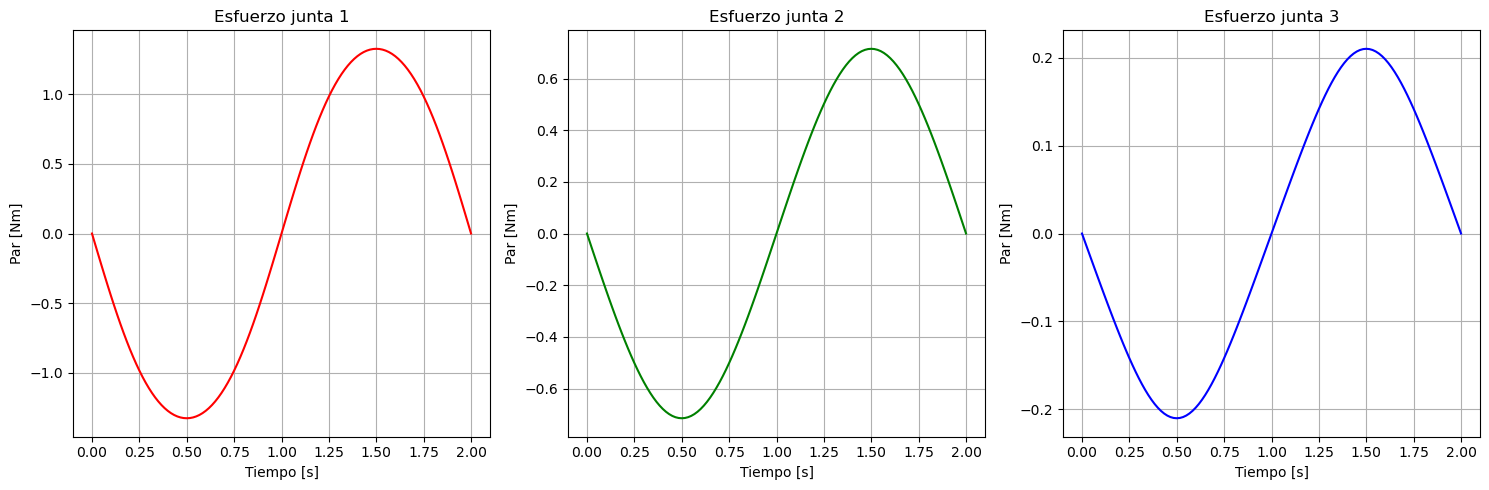

Gráficas de los pares en las juntas generadas correctamente.


In [16]:
###Colocar y correr el código dentro de estas celdas
import matplotlib.pyplot as plt

# Cargar los datos calculados en la celda anterior
tau_valores = np.load('tau_valores.npy')
t_m = np.load('t_m.npy')

# Crear gráficas para los pares en las juntas
fig, (tau_1_g, tau_2_g, tau_3_g) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Configurar y dibujar las gráficas
# Esfuerzo junta 1
tau_1_g.set_title("Esfuerzo junta 1")
tau_1_g.plot(t_m, tau_valores[0, :], color="RED")
tau_1_g.set_xlabel("Tiempo [s]")
tau_1_g.set_ylabel("Par [Nm]")
tau_1_g.grid(True)

# Esfuerzo junta 2
tau_2_g.set_title("Esfuerzo junta 2")
tau_2_g.plot(t_m, tau_valores[1, :], color="GREEN")
tau_2_g.set_xlabel("Tiempo [s]")
tau_2_g.set_ylabel("Par [Nm]")
tau_2_g.grid(True)

# Esfuerzo junta 3
tau_3_g.set_title("Esfuerzo junta 3")
tau_3_g.plot(t_m, tau_valores[2, :], color="BLUE")
tau_3_g.set_xlabel("Tiempo [s]")
tau_3_g.set_ylabel("Par [Nm]")
tau_3_g.grid(True)

# Ajustar el diseño para evitar superposición
plt.tight_layout()

# Mostrar la figura
plt.show()

print("Gráficas de los pares en las juntas generadas correctamente.")

### 4. Github
Para terminar, subir los archivos de la práctica al repositorio de github

## Análisis de resultados

¿Qué utilidad tiene el modelo de dinámica inversa de un robot?
> Es útil para calcular los pares exactos necesarios en cada articulación para seguir trayectorias precisas, permitiendo compensar efectos dinámicos como fuerzas centrífugas, gravitacionales y acoplamientos inerciales entre articulaciones.

## Conclusiones

En esta sección deberan escribir las conclusiones de la práctica con base en el objetivo planteado y las metas que se deban cumplir para su realización.

## Bibliografía 

- [1] A. Barrientos, L.F. Penin, C. Balaguer, R. Aracil, 1era Ed., Madrid, McGraw-Hill, 1997.
